Chapter 2

 If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set. We want to build a model that is able to generalize as accurately as possible.


In [40]:
import mglearn, matplotlib.pyplot as plt, numpy as np
from sklearn.datasets import load_breast_cancer, fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge  

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


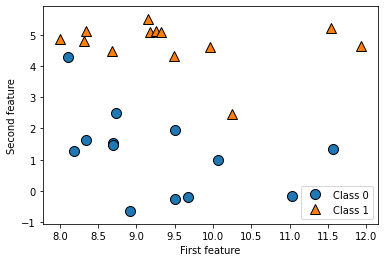

In [2]:
# generate dataset 
X, y = mglearn.datasets.make_forge() 
# plot dataset 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature") 
print("X.shape: {}".format(X.shape))


To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model. 

Text(0, 0.5, 'Target')

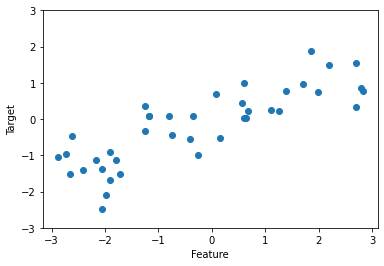

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40) 
plt.plot(X, y, 'o') 
plt.ylim(-3, 3) 
plt.xlabel("Feature") 
plt.ylabel("Target")


In [4]:
cancer = load_breast_cancer() 
print("cancer.keys(): \n{}".format(cancer.keys()))


cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(cancer.data.shape)

(569, 30)


In [10]:
print("Sample counts per class:\n{}".format(      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


Sample counts per class:
{'malignant': 212, 'benign': 357}


C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


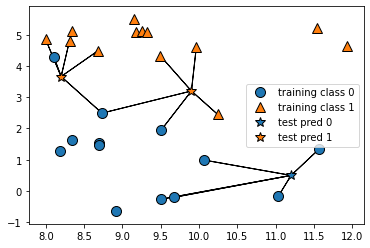

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

 When considering more than one neighbor, we use voting to assign a label. 

In [20]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30) 
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))


Test set predictions: [1 0 1 1 1 1 0]


C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [21]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Test set accuracy: 0.86


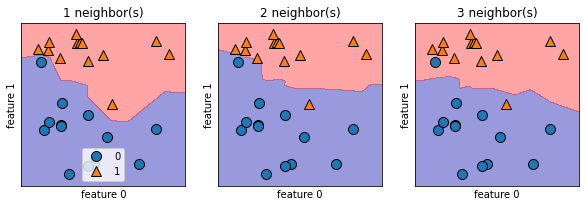

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1,2, 3, 4,5,6,7,8,9,10], axes):    
# the fit method returns the object self, so we can instantiate    # and fit in one line    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    
    ax.set_title("{} neighbor(s)".format(n_neighbors))    
    ax.set_xlabel("feature 0")    
    ax.set_ylabel("feature 1") 
axes[0].legend(loc=8)


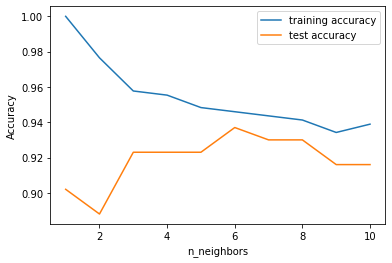

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = [] 
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:    
    # build the model    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
    clf.fit(X_train, y_train)    # record training set accuracy    
    training_accuracy.append(clf.score(X_train, y_train))    # record generalization accuracy    
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.legend()

 Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops.  The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse.

Analyzing KNeighborsRegressor

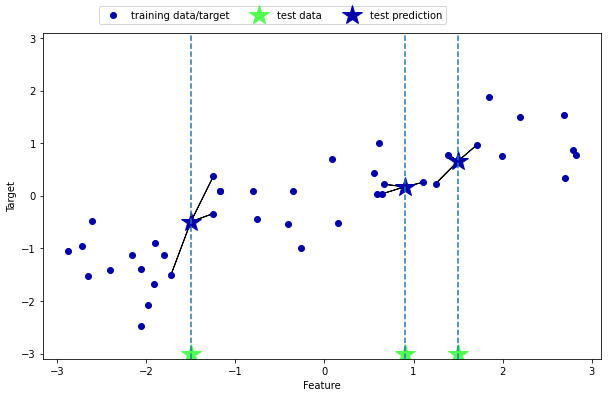

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)


In [28]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train) 
print("Test set predictions:\n{}".format(reg.predict(X_test)))


Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using the score method, which for regressors returns the R2 score. The R2 score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses

Linear Models 

w[0]: 0.393906  b: -0.031804


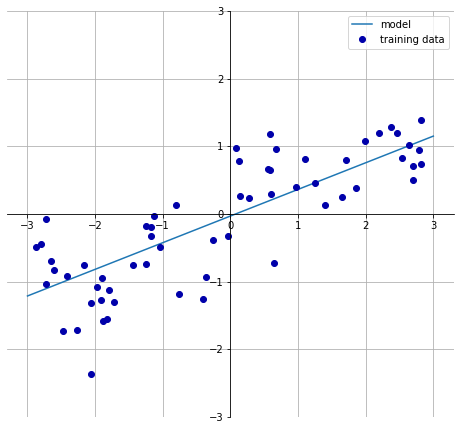

In [31]:
mglearn.plots.plot_linear_regression_wave()

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. 

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:


In [35]:
from sklearn.linear_model import LinearRegression 
X, y = mglearn.datasets.make_wave(n_samples=899990) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train) 
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [0.46301599]
lr.intercept_: -0.00038756603325368246


In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.63
Test set score: 0.63


Example
Training set score: 0.95 
Test set score: 0.61 
This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.


Ridge regression Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization. 

In [42]:
X, y =  mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

Training set score: 0.89
Test set score: 0.75


Decreasing alpha allows the coefficients to be less restricted, meaning we move right in Figure 2-1. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression:


In [48]:
ridge01 = Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.79
Test set score: 0.64


plots that show model performance as a function of dataset size are called learning curves

Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.8 The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection.

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


 To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [50]:
# we increase the default setting of "max_iter", 
# # otherwise the model would warn us that we should increase max_iter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Linear models for classification

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


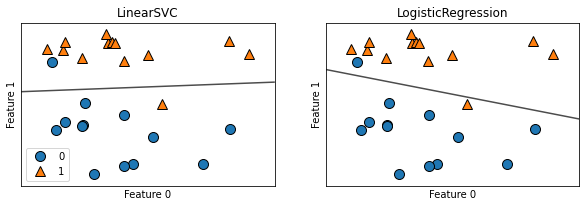

In [52]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):    
    clf = model.fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    
    ax.set_title("{}".format(clf.__class__.__name__))    
    ax.set_xlabel("Feature 0")    
    ax.set_ylabel("Feature 1") 
axes[0].legend()


for LinearLogistic the default value of c is 1. the best performance of the model is when the value of C is 100.

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

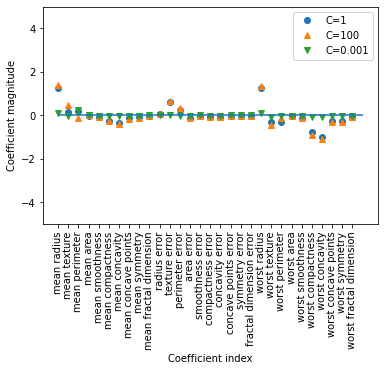

In [55]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()


Linear models for multiclass classification 
 A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes.

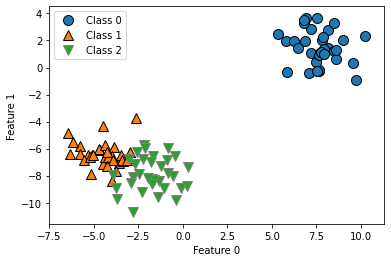

In [59]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=25) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(["Class 0", "Class 1", "Class 2"])


Decision Trees 
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. 
There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.


In [60]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(    cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train) 
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked 

Feature importance in trees Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1


In [63]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


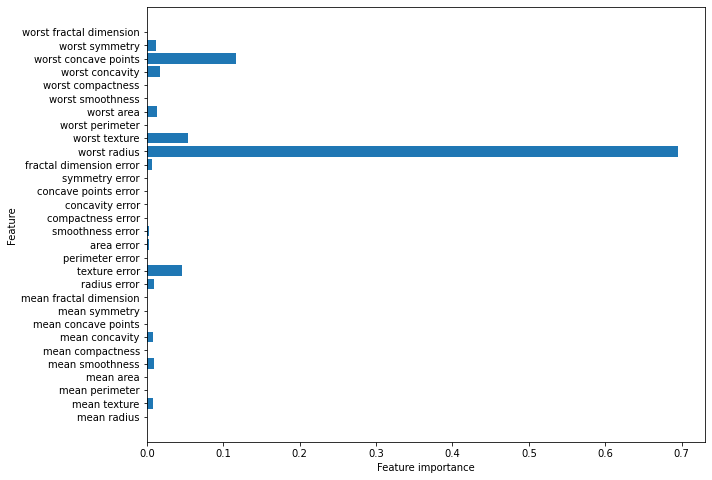

In [65]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,8))    
    n_features = cancer.data.shape[1]    
    plt.barh(range(n_features), model.feature_importances_, align='center')    
    plt.yticks(np.arange(n_features), cancer.feature_names)    
    plt.xlabel("Feature importance")    
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)
